https://towardsdatascience.com/autoencoders-in-keras-c1f57b9a2fd7

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

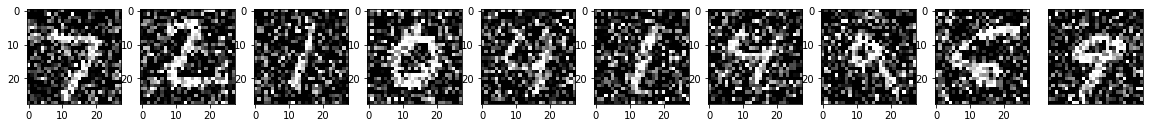

In [9]:
n = 10 # change this number to visualise more digits.
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
input_img = Input(shape=(28, 28, 1))
# Model Construction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# At this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(x_train_noisy,x_train,epochs=50,batch_size=128,shuffle=True,
                validation_data=(x_test_noisy, x_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 406s 7ms/step - loss: 0.1707 - val_loss: 0.1204
Epoch 2/50
60000/60000 [==============================] - 390s 6ms/step - loss: 0.1179 - val_loss: 0.1129
Epoch 3/50
60000/60000 [==============================] - 387s 6ms/step - loss: 0.1120 - val_loss: 0.1090
Epoch 4/50
60000/60000 [==============================] - 400s 7ms/step - loss: 0.1090 - val_loss: 0.1065
Epoch 5/50
60000/60000 [==============================] - 403s 7ms/step - loss: 0.1070 - val_loss: 0.1054
Epoch 6/50
60000/60000 [==============================] - 406s 7ms/step - loss: 0.1056 - val_loss: 0.1042
Epoch 7/50
60000/60000 [==============================] - 393s 7ms/step - loss: 0.1047 - val_loss: 0.1033
Epoch 8/50
60000/60000 [==============================] - 435s 7ms/step - loss: 0.1040 - val_loss: 0.1024
Epoch 9/50
  128/60000 [..............................] - ETA: 5:16 - loss: 0.1019

KeyboardInterrupt: 

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

In [15]:
feature_extractor = Model(inputs=autoencoder.input, 
                          outputs=autoencoder.encoded) 
x_condense = feature_extractor.predict(x_test[0:10])
x_condense.shape

AttributeError: 'Model' object has no attribute 'encoded'

In [ ]:
n = 10 # change this number to visualise more digits.
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_condense[i].reshape(28, 28))
    plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()